## 第三章 神经网络

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from dataset.mnist import load_mnist

### 3.1 从感知机到神经网络

### 3.2 激活函数

#### 3.2.2 阶跃函数的实现

In [2]:
# 单个数
def step_func(x):
    if x > 0:
        return 1
    else:
        return 0

In [3]:
print(step_func(0.5))
print(step_func(-2))

1
0


In [4]:
# 多个数的np数组
def step(x):
    return (x > 0).astype(int)

In [5]:
x = np.array([-1, 0, 1, 2])
step(x)

array([0, 0, 1, 1])

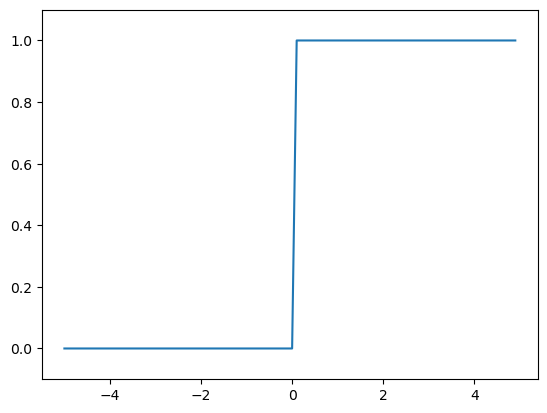

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = step(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 3.2.4 Sigmoid 函数的实现

In [7]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

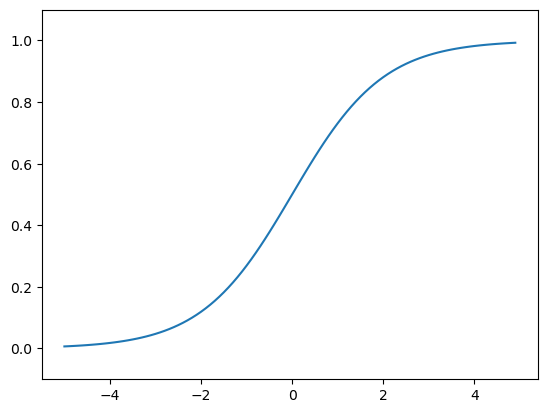

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 3.2.7 ReLU 函数的实现

In [9]:
# ReLU function
def relu(x):
    return np.maximum(0, x)

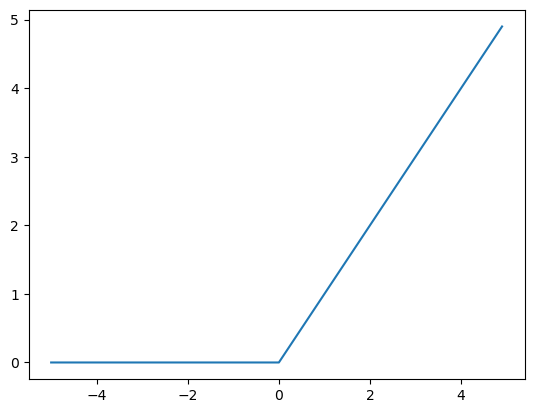

In [10]:
x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

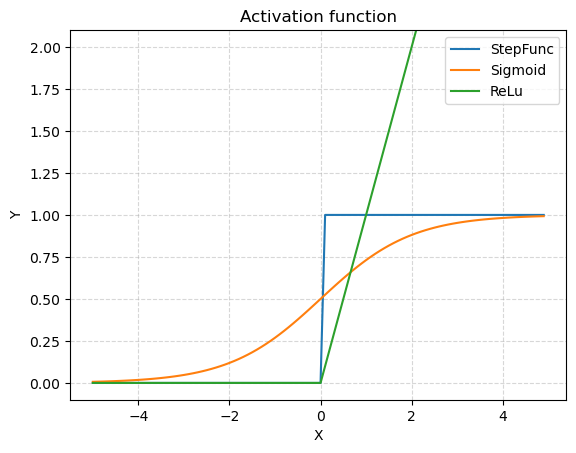

In [11]:
# 比较三条线
x = np.arange(-5, 5, 0.1)
y1, y2, y3 = step(x), sigmoid(x), relu(x)

plt.plot(x, y1, label='StepFunc')
plt.plot(x, y2, label='Sigmoid')
plt.plot(x, y3, label='ReLu')
plt.ylim(-0.1, 2.1)
plt.title('Activation function')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

### 3.3 多维数组的运算

In [12]:
x = np.array([[1,2], [3,4], [5,6]])
print(x)
print(np.ndim(x))
print(x.shape)
print(x.size)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
6


In [13]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
print(A*B)
print(np.dot(A, B))

[[ 5 12]
 [21 32]]
[[19 22]
 [43 50]]


In [14]:
C = np.array([[1,2,3], [4,5,6]])
D = np.array([[1,2], [3,4], [5,6]])
np.dot(C, D)    # 2, 3 * 3, 2 = 2, 2

array([[22, 28],
       [49, 64]])

In [15]:
E = np.array([[1], [2], [3], [4]])
F = np.array([[1,2,3,4]])
print(E.shape)
print(F.shape)

(4, 1)
(1, 4)


In [16]:
print(E)
print(F)
print(np.dot(E, F))

[[1]
 [2]
 [3]
 [4]]
[[1 2 3 4]]
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]


In [17]:
X = np.array([1, 2])    # 两个输入神经元
W = np.array([[1, 3, 5], [2, 4, 6]])    # 权重
print(X.shape)
print(W.shape)

(2,)
(2, 3)


In [18]:
np.dot(X, W)    # 1*1+2*2=5, 1*3+2*4=11, 1*5+2*6=17

array([ 5, 11, 17])

### 3.4 三层神经网络的实现

#### 3.4.2 分层: 各层间信号传递的实现

In [19]:
# 第0层 （输入层）
X = np.array([1.0, 0.5])

In [20]:
# 第1层 （隐藏层）
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1 # 加权输入 / 加权总和
Z1 = sigmoid(A1) # 激活函数
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [21]:
# 第2层 （隐藏层）
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [22]:
# 第3层 （输出层）
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3

def identity_function(x):
    return x

Y = identity_function(A3)
print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


#### 3.4.3 汇总：一次实现多层

In [23]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [24]:
Y == y    # 分层实现 与 汇总实现 两次结果一样

array([ True,  True])

### 3.5 输出层的设计 (Softmax)

In [25]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [26]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [27]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [28]:
# Softmax 的实现 (有缺陷，就是溢出. 如果a=1000的话，e的1000次幂会返回无穷大的数)
def softmax(a):
    exp_a = np.exp(a)
    return exp_a / np.sum(exp_a)

print(softmax(a))

[0.01821127 0.24519181 0.73659691]


In [29]:
c = np.max(a)
a - c

array([-3.7, -1.1,  0. ])

In [30]:
exp_a = np.exp(a-c)
exp_a

array([0.02472353, 0.33287108, 1.        ])

In [31]:
y = exp_a / np.sum(exp_a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [32]:
# Softmax 的改进，通过减去最大值
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a / np.sum(exp_a)

softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

### 3.6 手写数字识别

#### 3.6.1 MNIST 数据集

In [33]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [34]:
# 显示训练图像的第一张
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]

print(label)        # 5
print(img.shape)    # (784,)
img = img.reshape(28, 28)  # 把图像的形状变成原来的尺寸
print(img.shape)    # (28, 28)

img_show(img)    # 会打开第三方应用查看图片

5
(784,)
(28, 28)


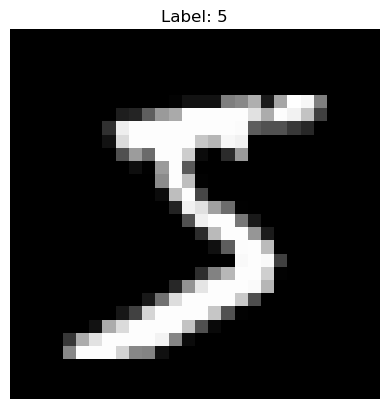

标签: 5
图像形状: (28, 28)


In [35]:
# Plot第一张图像
img = x_train[0].reshape(28, 28)
label = t_train[0]

plt.imshow(img, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')  # 不显示坐标轴
plt.show()

print(f"标签: {label}")
print(f"图像形状: {img.shape}")

#### 3.6.2 神经网络的推理处理

In [36]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open('dataset/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [37]:
# 利用测试数据预测准确度
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    pos = np.argmax(y)
    if pos == t[i]:
        accuracy_cnt += 1

print(f'Accuracy: {accuracy_cnt / len(x):.2%}')

Accuracy: 93.52%


#### 3.6.3 批处理 (一次性计算大型数组要比分开逐步计算各个小型数组速度更快)

In [38]:
# 查看测试数据x 和神经网络参数的信息
print(x.shape)
print(network['W1'].shape)
print(network['W2'].shape)
print(network['W3'].shape)
print(network['b1'].shape)
print(network['b2'].shape)
print(network['b3'].shape)

(10000, 784)
(784, 50)
(50, 100)
(100, 10)
(50,)
(100,)
(10,)


In [39]:
# 查看神经网络预测第一条测试数据的输出结果，以及对应的标签信息
y = predict(network, x[0])
print(y)
print(np.max(y))
print(np.argmax(y))
print(t[0])

[8.4412408e-05 2.6350631e-06 7.1549317e-04 1.2586251e-03 1.1727932e-06
 4.4990808e-05 1.6269318e-08 9.9706501e-01 9.3744620e-06 8.1831042e-04]
0.997065
7
7


In [40]:
# 创建示例矩阵
A = np.random.rand(3, 4)  # 3x4矩阵
B = np.random.rand(4, 5)  # 4x5矩阵

print("矩阵A形状:", A.shape)
print("矩阵B形状:", B.shape)

# 矩阵乘法
C = np.dot(A, B)  # 或者 A @ B
print("乘积结果形状:", C.shape)  # 输出: (3, 5)
C

矩阵A形状: (3, 4)
矩阵B形状: (4, 5)
乘积结果形状: (3, 5)


array([[0.5802856 , 0.27589979, 1.23572565, 0.69852202, 1.60069651],
       [0.57363146, 0.19760671, 0.92734038, 0.6224551 , 1.48983291],
       [0.55323739, 0.10096184, 0.92712339, 0.7385914 , 1.57894408]])

In [41]:
# 理解axis=0 和 1的不同处理方式
# axis=0 按行操作，比较不同行里 相同列的数据 - 跨样本操作
# axis=1 按列操作，比较同一行里 不同列的数据 - 单个样本内部操作
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
print(x.ndim)
print(x.shape)
print(np.max(x, axis=0))
print(np.max(x, axis=1))
print(np.argmax(x, axis=0))
print(np.argmax(x, axis=1))
print(np.sum(x))
print(np.sum(x, axis=0))
print(np.sum(x, axis=1))

2
(4, 3)
[0.8 0.8 0.6]
[0.8 0.6 0.5 0.8]
[3 0 1]
[1 2 1 0]
4.0
[1.4 1.5 1.1]
[1. 1. 1. 1.]


In [42]:
# 理解Numpy数组比较方式
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


np.int64(3)

In [43]:
# 利用测试数据预测准确度
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    pos = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(pos == t[i:i+batch_size])

print(f'Accuracy: {accuracy_cnt / len(x):.2%}')

Accuracy: 93.52%
